In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('gapminder_tidy.csv')

In [3]:
df.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [4]:
df = df.rename(columns={'Country':'country', 'Year':'year'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111 entries, 0 to 10110
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          10111 non-null  object 
 1   year             10111 non-null  int64  
 2   fertility        10100 non-null  float64
 3   life             10111 non-null  float64
 4   population       10108 non-null  float64
 5   child_mortality  9210 non-null   float64
 6   gdp              9000 non-null   float64
 7   region           10111 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 632.1+ KB


In [6]:
df.isna().sum()

country               0
year                  0
fertility            11
life                  0
population            3
child_mortality     901
gdp                1111
region                0
dtype: int64

In [7]:
df.loc[:, 'fertility'] = round(df.fillna(df['fertility'].mean()), 3)

In [8]:
df.loc[:, 'population'] = df.fillna(df['population'].median())

In [9]:
df = df.dropna(subset=['child_mortality'],axis=0)

In [10]:
df = df.dropna(subset=['gdp'],axis=0)

In [11]:
df.shape

(8836, 8)

In [12]:
df[df['child_mortality'].isna()]

,country,year,fertility,life,population,child_mortality,gdp,region


In [13]:
df[df['gdp'].isna()]

,country,year,fertility,life,population,child_mortality,gdp,region


In [14]:
df['child_mortality'] = df['child_mortality'].fillna(0)
df['gdp'] = df['gdp'].fillna(0)

In [15]:
df['population'].median()

5408103.0

In [16]:
df['child_mortality'].mean()

83.17598234495246

In [18]:
df.groupby(['country','region'])[['fertility']].agg({'mean', 'median'}).reset_index()

country                      region fertility         
                                                        median     mean
0            Afghanistan                  South Asia    7.6710  7.35978
1                Albania       Europe & Central Asia    3.0490  3.29010
2                Algeria  Middle East & North Africa    5.1385  5.06534
3                 Angola          Sub-Saharan Africa    7.1835  6.98880
4    Antigua and Barbuda                     America    2.2160  2.52870
..                   ...                         ...       ...      ...
173            Venezuela                     America    3.5605  3.80530
174              Vietnam         East Asia & Pacific    3.7450  3.91474
175   West Bank and Gaza  Middle East & North Africa    6.5375  6.38354
176               Zambia          Sub-Saharan Africa    6.5715  6.63380
177             Zimbabwe          Sub-Saharan Africa    5.4670  5.60802

[178 rows x 4 columns]

In [19]:
df.groupby(['country','region','year'])[['fertility']].agg({'mean', 'median'}).reset_index()

country              region  year fertility       
                                               median   mean
0     Afghanistan          South Asia  1964     7.671  7.671
1     Afghanistan          South Asia  1965     7.671  7.671
2     Afghanistan          South Asia  1966     7.671  7.671
3     Afghanistan          South Asia  1967     7.671  7.671
4     Afghanistan          South Asia  1968     7.671  7.671
...           ...                 ...   ...       ...    ...
8831     Zimbabwe  Sub-Saharan Africa  2009     3.792  3.792
8832     Zimbabwe  Sub-Saharan Africa  2010     3.721  3.721
8833     Zimbabwe  Sub-Saharan Africa  2011     3.643  3.643
8834     Zimbabwe  Sub-Saharan Africa  2012     3.564  3.564
8835     Zimbabwe  Sub-Saharan Africa  2013     3.486  3.486

[8836 rows x 5 columns]

In [76]:
#df.groupby(['country','region','year'])[['fertility']].describe()

In [20]:
# Correct way to select rows for EITHER Albania OR Afghanistan
arg_aus = df[(df['country'] == 'Argentina') | (df['country'] == 'Australia')]
arg_aus.head()

,country,year,fertility,life,population,child_mortality,gdp,region
250,Argentina,1964,3.068,65.388,21966478.0,57.43,8227.0,America
251,Argentina,1965,3.058,65.481,22296628.0,57.43,8818.0,America
252,Argentina,1966,3.051,65.603,22622012.0,58.63,8709.0,America
253,Argentina,1967,3.048,65.759,22944941.0,58.52,8782.0,America
254,Argentina,1968,3.049,65.953,23273148.0,58.32,9003.0,America


In [21]:
df[(df['country'] == 'Albania') | (df['country'] == 'Afghanistan')]

,country,year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia
...,...,...,...,...,...,...,...,...
95,Albania,2009,1.744,76.598,3192723.0,17.3,8994.0,Europe & Central Asia
96,Albania,2010,1.741,76.780,3204284.0,16.6,9374.0,Europe & Central Asia
97,Albania,2011,1.748,76.979,3215988.0,16.0,9640.0,Europe & Central Asia
98,Albania,2012,1.760,77.185,3227373.0,15.5,9811.0,Europe & Central Asia


In [119]:
#sub.country.value_counts()

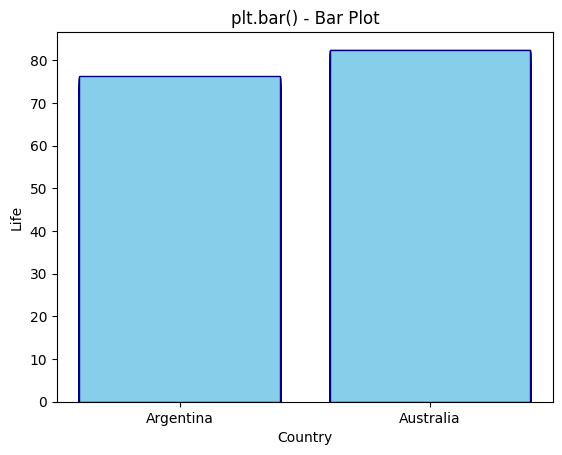

In [22]:
#plt.subplot(3, 3, 3)
plt.bar(arg_aus['country'], arg_aus['life'], color='skyblue', edgecolor='navy')
plt.title('plt.bar() - Bar Plot')
plt.xlabel('Country')
plt.ylabel('Life')
plt.show()

In [23]:
sub = df[(df['country'] == 'Albania') | (df['country'] == 'Afghanistan')]
sub.head()

,country,year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


Text(0, 0.5, 'Countries')

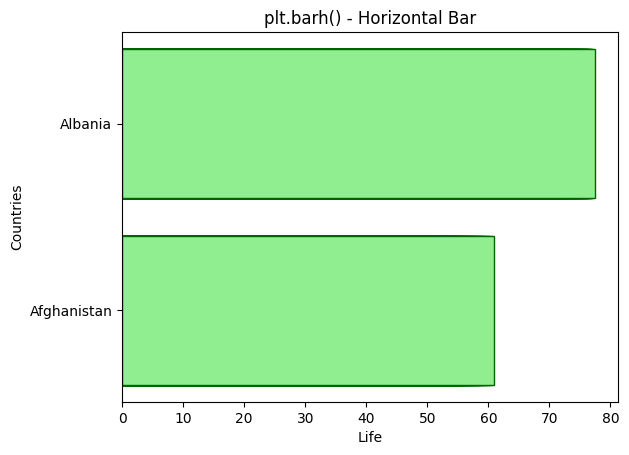

In [24]:
# Example 4: Horizontal bar plot (plt.barh)
#plt.subplot(3, 3, 4)
plt.barh(sub['country'], sub['life'], color='lightgreen', edgecolor='darkgreen')
plt.title('plt.barh() - Horizontal Bar')
plt.xlabel('Life')
plt.ylabel('Countries')

In [25]:
region = df[df['region'] == 'America']
region.head()

,country,year,fertility,life,population,child_mortality,gdp,region
200,Antigua and Barbuda,1964,4.250,63.775,58653.0,72.78,5008.0,America
201,Antigua and Barbuda,1965,4.193,64.149,59844.0,69.91,5133.0,America
202,Antigua and Barbuda,1966,4.125,64.511,61032.0,66.69,5262.0,America
203,Antigua and Barbuda,1967,4.042,64.865,62226.0,63.53,5393.0,America
204,Antigua and Barbuda,1968,3.942,65.213,63401.0,60.97,5528.0,America


Text(0, 0.5, 'Countries')

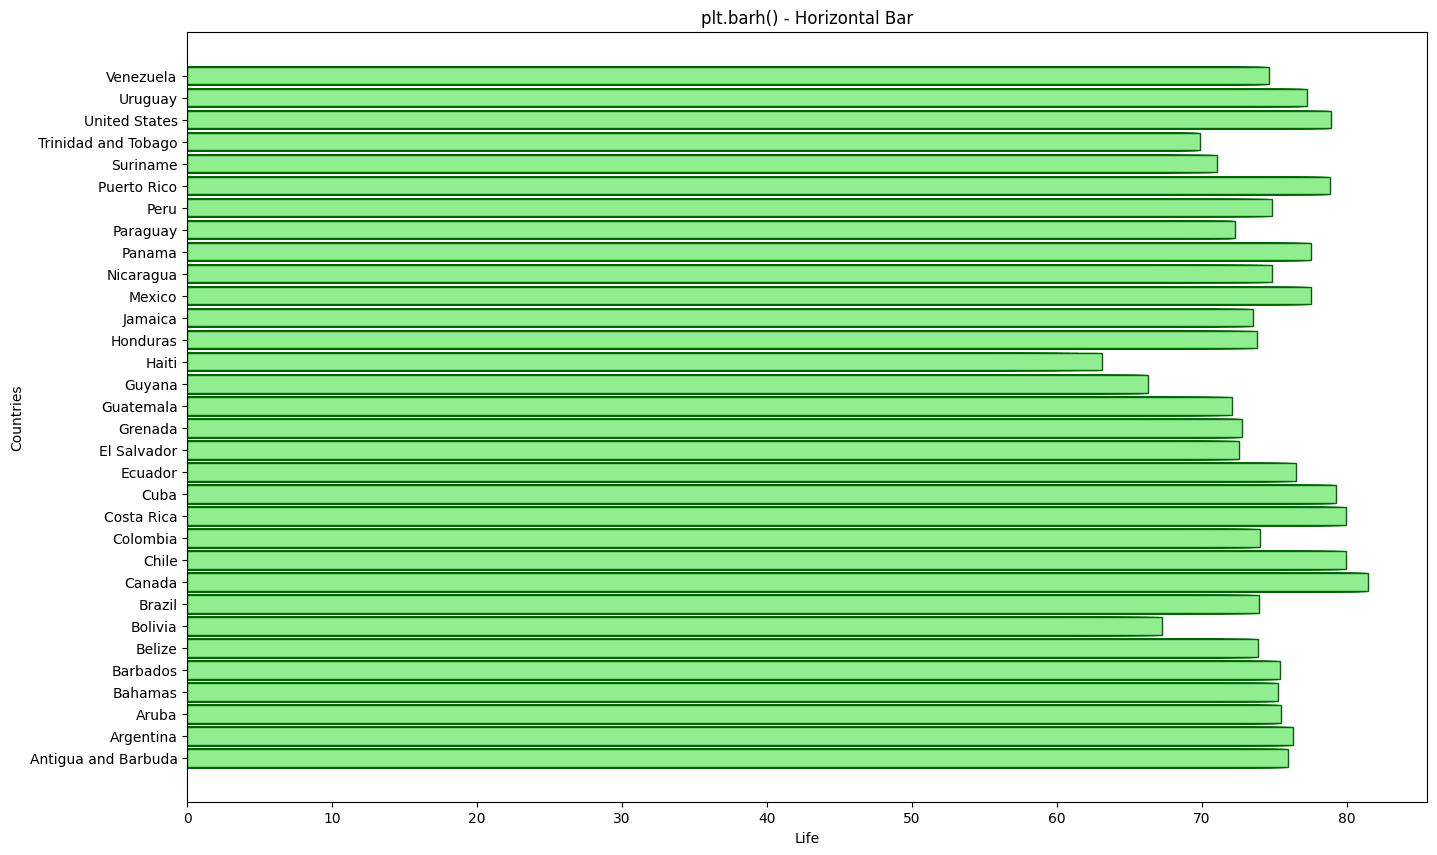

In [26]:
plt.figure(figsize=(16,10))
plt.barh(region['country'], region['life'], color='lightgreen', edgecolor='darkgreen')
plt.title('plt.barh() - Horizontal Bar')
plt.xlabel('Life')
plt.ylabel('Countries')